# **Housing price prediction using linear regression** 
(*Regularised Gradient Descent and Regularised Normal equation*)

---

Name: J Narasimha



In [1]:
from IPython.display import Image
Image(url="https://prutor.ai/wp-content/uploads/housing-price-prediction.jpg",width = 700, height = 300,)

# Problem Statement

The real estate markets present an interesting opportunity for data analysts to analyze and predict where property prices are moving upwards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. The buyers are just not concerned only about the size(square feet) of the house but there are various other factors that play a key role to decide the price of a house/property. Considering the data provided, we are wrangling a large set of property sales records with unknown data quality issues.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:\\Users\\Narasimha\\Downloads\\Housing_Price_data_set.csv")
data=data.drop(['Unnamed: 0','driveway','recroom','fullbase','airco','prefarea', 'gashw'],axis=1)
mean = data.mean()[0]
stddev = data.std()[0]
data = (data - data.mean())/data.std()

data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl
0,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,-0.285425,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [5]:
 
data=np.asarray(data)
Y=data[:,0:1]
X=data[:,1:]
one = np.ones((len(X),1))
X = np.concatenate((one,X),axis=1)
split_ratio = 0.9
split = int(split_ratio * X.shape[0])
X_test = X[split+1:,:]
X_train = X[:split+1, :]
Y_test = Y[split+1:,:]
Y_train = Y[:split+1, :]

In [6]:
# helper Functions
def computeCost(X,y,theta,lam):
    tobesummed = np.power(((X.dot(theta.T))-y),2)+lam*np.sum(np.power(theta,2))
    return np.sum(tobesummed)/(2 * len(X))

def denormalise_price(price):
    global mean
    global stddev
    ret = price * stddev + mean
    return ret

def computeError(predicted, actual):
    error = 0
    for i in range(len(predicted)):
        error += abs(actual[i] - predicted[i]) / actual[i]
    error /= len(actual)
    return error[0]

def plotGraph(x,y,labelX='X',labelY='Y',title='X vs Y'):
  fig, ax = plt.subplots()  
  ax.plot(x, y, 'r')
  ax.set_xlabel(labelX) 
  ax.set_ylabel(labelY)  
  ax.set_title(title)

In [7]:
# Gradient Descent
def gradientDescent(X,y,theta,iters,alpha, lam):
    lam_matrix = lam * np.ones(theta.shape)
    lam_matrix[0][0] = 0
    for i in range(iters):
        theta = theta*(1- lam_matrix / len(X)) - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)

    return theta

In [8]:
#Normal equation
def normalEquation(X,Y,lam):
    lam_matrix = lam * np.identity(X.shape[1])
    lam_matrix[0][0] = 0
    theta = np.linalg.inv(X.T.dot(X) + lam_matrix).dot(X.T).dot(Y)
    return theta
    

min Error  :  13.960611355440056 %
Optimal Lambda :  24


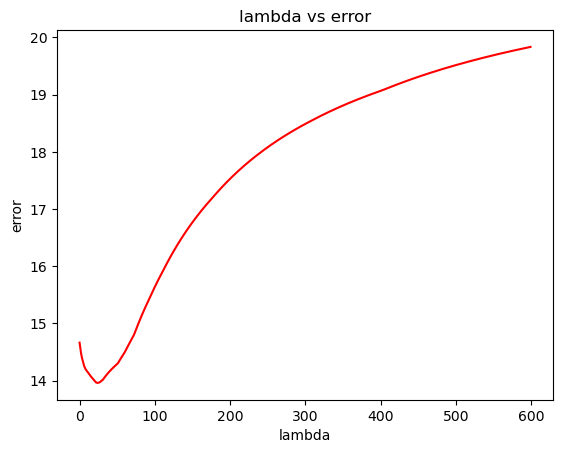

In [9]:
theta = np.zeros([1,X.shape[1]])
alpha = .1 #learning rate
iters = 500 #epoch
error_matrix = []
lam_range = 600 #maximam lamda
for lam in range(lam_range):
    g = gradientDescent(X_train,Y_train,theta,iters,alpha, lam)
    Cost = computeCost(X_train,Y_train,g,lam)

    Y_pred = X_test.dot(g.T)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_matrix.append(error*100)
optimal_lambda = 0
min_error = 9999
for i in range(len(error_matrix)):
    if error_matrix[i] < min_error:
        optimal_lambda = i
        min_error = error_matrix[i]

print("min Error  : ", (min_error),'%')
print("Optimal Lambda : ", optimal_lambda)
plotGraph(np.arange(lam_range),error_matrix,'lambda','error','lambda vs error')

In [10]:
print('pred price =',denormalise_price(Y_pred[2][0]),'actual price =',denormalise_price(Y_test[2][0]))

pred price = 64257.57664950318 actual price = 58500.0


min Error :  13.432288061521577
Optimal Lambda :  311


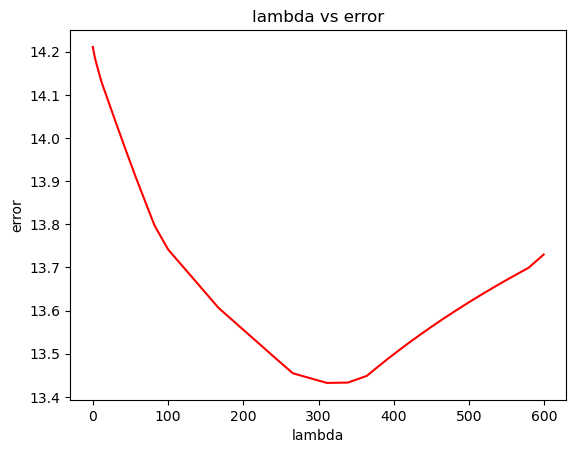

In [11]:
error_mat = []
lam_range = 600

for lam in range(lam_range):
    theta = normalEquation(X,Y,lam)
    Cost = computeCost(X_train,Y_train,theta.T,lam)
    Y_pred = X_test.dot(theta)
    error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
    error_mat.append(error*100)

optimal_lambda = 0
min_error = 9999
for i in range(len(error_mat)):
    if error_mat[i] < min_error:
        optimal_lambda = i
        min_error = error_mat[i]
print("min Error : ", min_error)
print("Optimal Lambda : ", optimal_lambda)
plotGraph(np.arange(lam_range),error_mat,'lambda','error','lambda vs error')

In [12]:
print('pred price =',denormalise_price(Y_pred[2][0]),'actual price =',denormalise_price(Y_test[2])[0])

pred price = 57100.426317244695 actual price = 58500.0
